In [1]:
from MixedAutoencoder import Mixer, MixedAutoencoder
import MixedAutoencoder
from DataCleaning import *
import DataCleaning
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
seed = 42
MixedAutoencoder.setRandom(seed)
DataCleaning.setRandom(seed)
base_path = "."
mixer = Mixer(base_path)

In [2]:
test_dims = list(range(3, 20))
model_shape = []
results = []
num_sets = 4
key_list = [f'set{str(i)}' for i in range(1, num_sets+1)]
model_shapes = {k: model_shape for k in key_list}

In [3]:
data = pd.read_csv(f'{base_path}/data/16PF/data.csv', sep="\t")
data = clean_data(data)
column_keys = split_strat(data,num_sets, key_list)
data = split(data, column_keys)
train, test = make_train_test(data, 0.8)
input_dims = get_input_dims(train)

In [4]:
def test_dim(latent_dim):
    autoencoder_set = mixer.make_new(model_shapes, latent_dim, input_dims)
    settings = {
        "training": [["$all", "$all", True, True]]#[[[k1], [k2 for k2 in keys if k1 != k2], True, True] for k1 in keys],
        #"encoder_proximity_training": [["$all", True]],
        #"plot": [True, 3, [0, 1, 2]]
    }
    autoencoder_set.train_set(train, 25, autoencoder_set.make_train_config(settings = settings), batch_size = 64, verbose=False)
    return autoencoder_set.total_binary_accuracy(test)

In [5]:
for latent_dim in test_dims:
    acc = test_dim(latent_dim)
    results.append((latent_dim, acc))
    print(f'Binary accuracy in {str(latent_dim)}d is: {acc}')

Binary accuracy in 3d is: 0.7750376309944998
Binary accuracy in 4d is: 0.7827717243395257
Binary accuracy in 5d is: 0.7889262398908701
Binary accuracy in 6d is: 0.7912050989997548
Binary accuracy in 7d is: 0.7905923353727988
Binary accuracy in 8d is: 0.7932668239104651
Binary accuracy in 9d is: 0.7939682051695579
Binary accuracy in 10d is: 0.7943839940596787
Binary accuracy in 11d is: 0.7955679424245784
Binary accuracy in 12d is: 0.79228195022629
Binary accuracy in 13d is: 0.7934553988717421
Binary accuracy in 14d is: 0.7929333528208127
Binary accuracy in 15d is: 0.7936506936534656
Binary accuracy in 16d is: 0.7939799648553391
Binary accuracy in 17d is: 0.7938312888279625
Binary accuracy in 18d is: 0.7921929126053752
Binary accuracy in 19d is: 0.7920702758822284


In [6]:
print(results)

[(3, 0.7750376309944998), (4, 0.7827717243395257), (5, 0.7889262398908701), (6, 0.7912050989997548), (7, 0.7905923353727988), (8, 0.7932668239104651), (9, 0.7939682051695579), (10, 0.7943839940596787), (11, 0.7955679424245784), (12, 0.79228195022629), (13, 0.7934553988717421), (14, 0.7929333528208127), (15, 0.7936506936534656), (16, 0.7939799648553391), (17, 0.7938312888279625), (18, 0.7921929126053752), (19, 0.7920702758822284)]


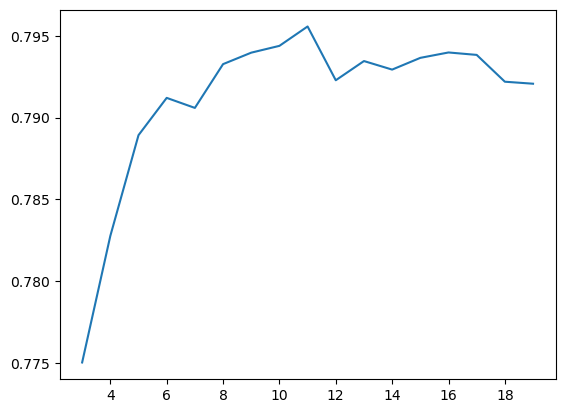

In [7]:
plt.plot([r[0] for r in results], [r[1] for r in results])